**Project title :- Santander customer transaction prediction using Python**

**Problem statement :-**

In this challenge, we need to identify which customers will make a specific transaction in
the future, irrespective of the amount of money transacted.


**Contents:**

 1. Exploratory Data Analysis
           * Loading dataset and libraries
           * Data cleaning
           * Typecasting the attributes
           * Target classes count        
           * Missing value analysis
        2. Attributes Distributions and trends
           * Distribution of train attributes
           * Distribution of test attributes
           * Mean distribution of attributes
           * Standard deviation distribution of attributes
           * Skewness distribution of attributes
           * Kurtosis distribution of attributes      
           * Outliers analysis
        4. Correlation matrix 
        5. Split the dataset into train and test dataset
        7. Modelling the training dataset
           * Logistic Regression Model
           * SMOTE Model
           * LightGBM Model
        8. Cross Validation Prediction
           * Logistic  Regression CV Prediction
           * SMOTE CV Prediction
           * LightGBM CV Prediction
        9. Model performance on test dataset
           * Logistic Regression Prediction
           * SMOTE Prediction
           * LightGBM Prediction
        10. Model Evaluation Metrics
           * Confusion Matrix
           * ROC_AUC score
        11. Choosing best model for predicting customer transaction

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,classification_report,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import tree
import graphviz
from pdpbox import pdp, get_dataset, info_plots
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve


from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))

random_state=42
np.random.seed(random_state)

Using TensorFlow backend.


['test.csv', 'train.csv']


**Importing the train dataset**

In [2]:
#importing the train dataset
train_df=pd.read_csv('../input/train.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


**Shape of the train dataset**

In [3]:
#Shape of the train dataset
train_df.shape

(200000, 202)

Summary of the dataset

In [4]:
#Summary of the dataset
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

**Target classes count**

Count of target classes :
 0    179902
1     20098
Name: target, dtype: int64
percentage of count of target classes :
 0    89.951
1    10.049
Name: target, dtype: float64
CPU times: user 1.39 s, sys: 796 ms, total: 2.18 s
Wall time: 1.3 s


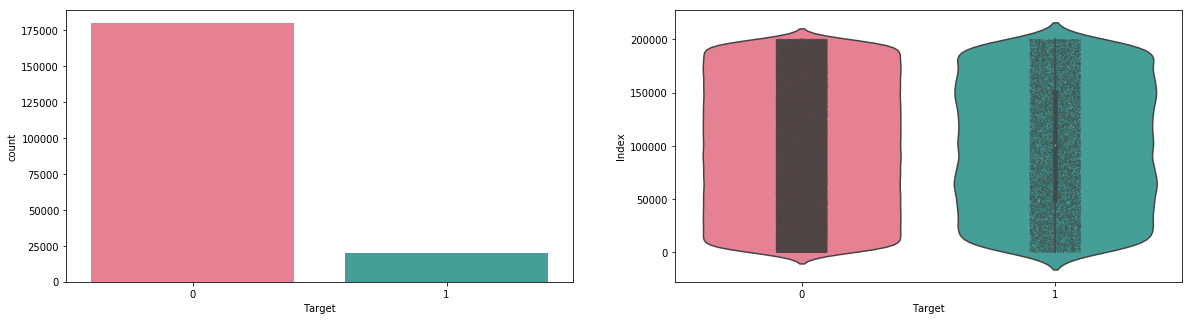

In [5]:
%%time
#target classes count
target_class=train_df['target'].value_counts()
print('Count of target classes :\n',target_class)
#Percentage of target classes count
per_target_class=train_df['target'].value_counts()/len(train_df)*100
print('percentage of count of target classes :\n',per_target_class)

#Countplot and violin plot for target classes
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(train_df.target.values,ax=ax[0],palette='husl')
sns.violinplot(x=train_df.target.values,y=train_df.index.values,ax=ax[1],palette='husl')
sns.stripplot(x=train_df.target.values,y=train_df.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='husl')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')

**Take aways:**                   
* We have a unbalanced data,where 90% of the data is the number of customers those will not make a transaction and 10% of the data is those who will make a transaction.
* Look at the violin plots seems that there are no relationship between the target with the index of the train dataframe.This is more dominated by the zero targets then for the ones.
* Look at the jitter plots with violin plots. We can observed that targets looks uniformly distributed over the indexs of the dataframe.

**Let us look distribution of train attributes**

In [6]:
%%time
#Distribution of train attributes
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs


Let us see first 100 train attributes will be displayed in next cell.

<Figure size 432x288 with 0 Axes>

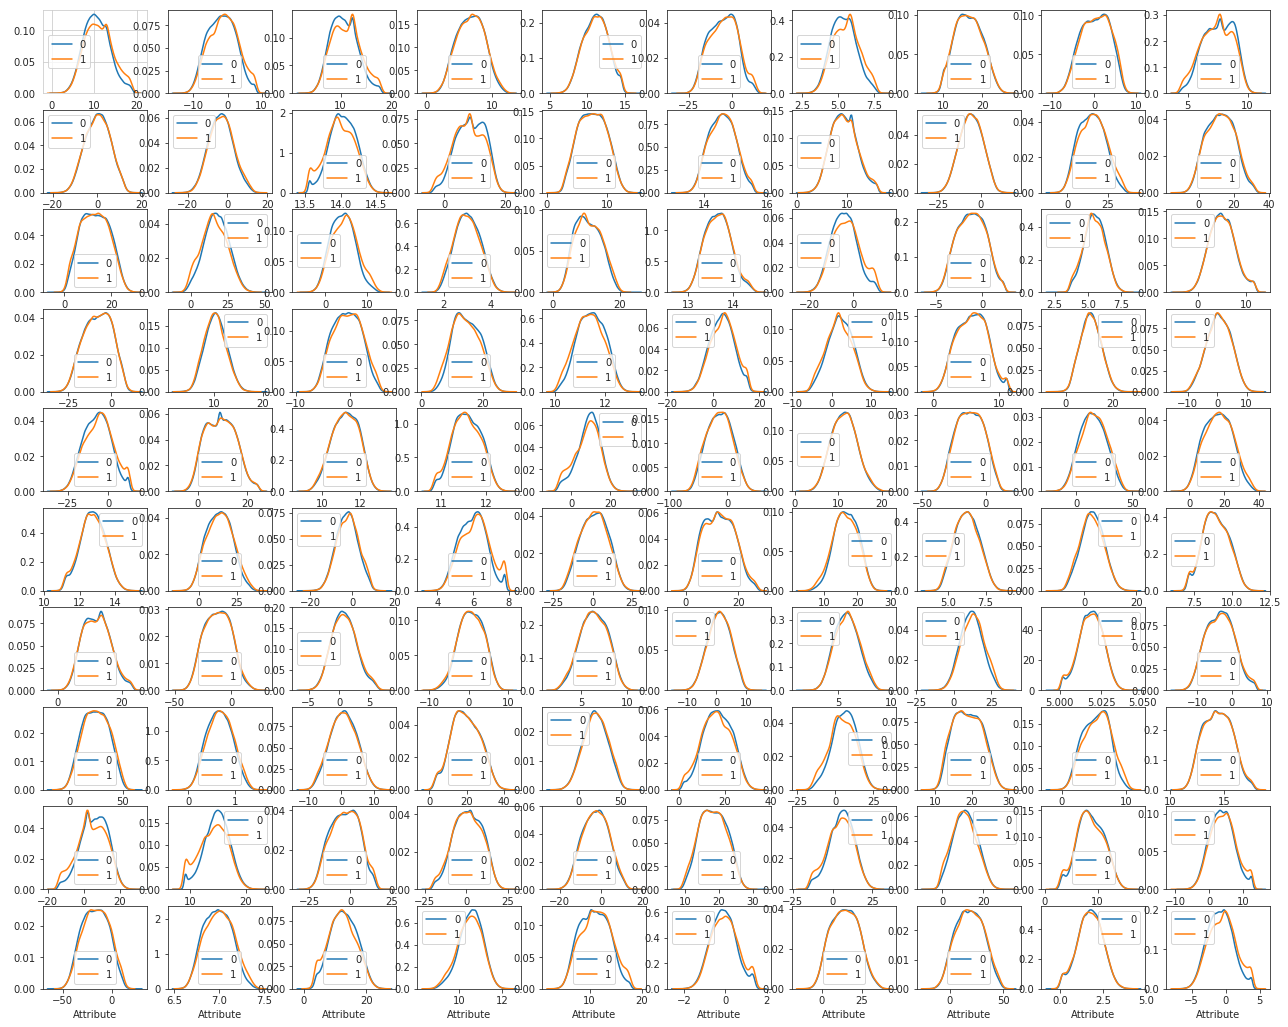

CPU times: user 17.9 s, sys: 4.66 s, total: 22.5 s
Wall time: 17.6 s


In [7]:
%%time
#corresponding to negative class
t0=train_df[train_df.target.values==0]
#corresponding to positive class
t1=train_df[train_df.target.values==1]
#train attributes from 2 to 102
train_attributes=train_df.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

Let us see next 100 train attributes will be displayed in next cell.

<Figure size 432x288 with 0 Axes>

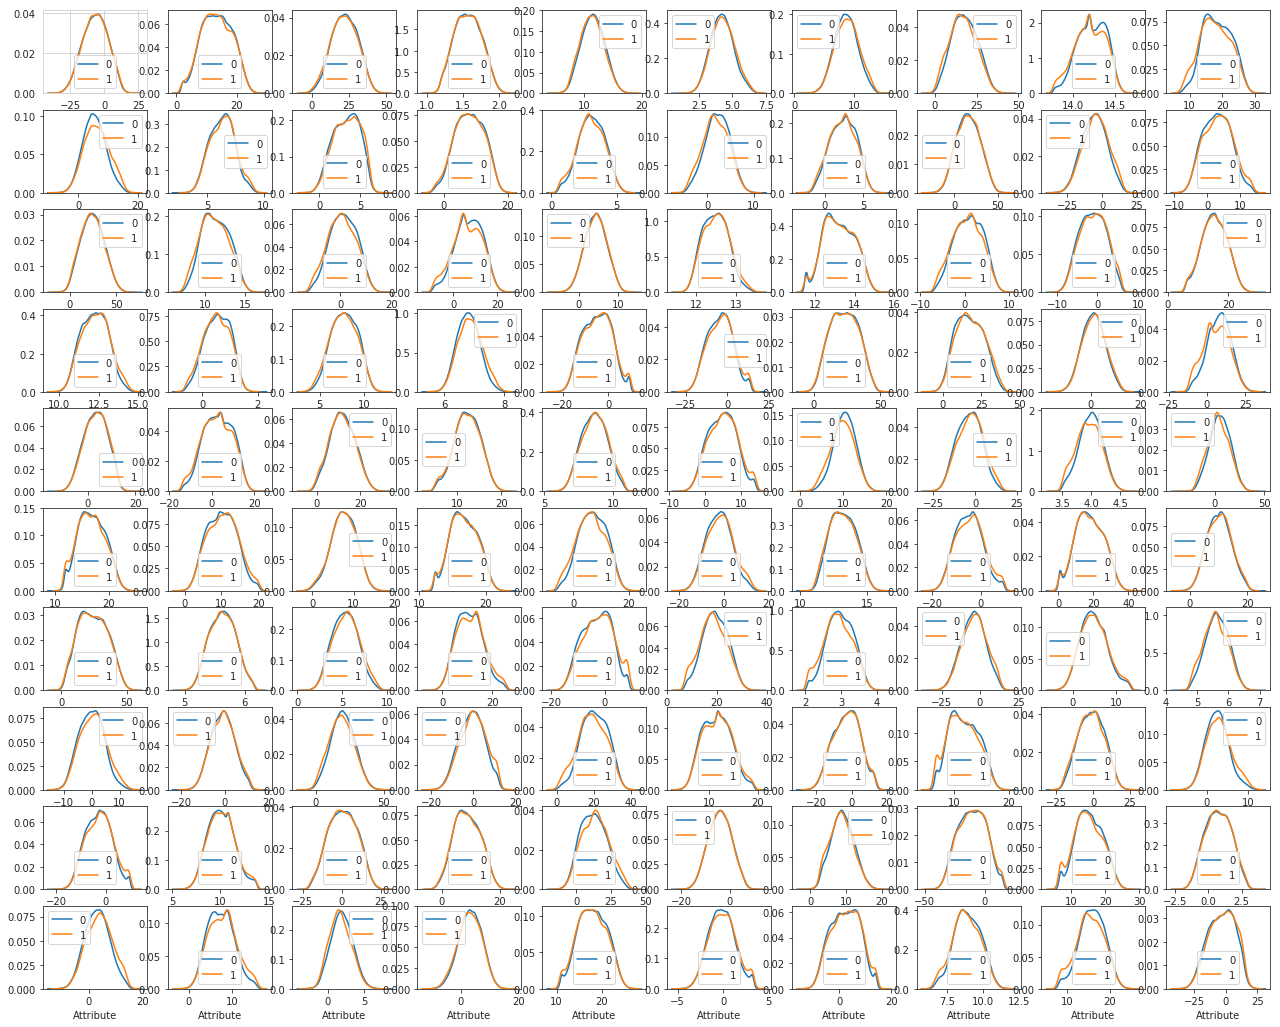

CPU times: user 17.5 s, sys: 4.4 s, total: 21.9 s
Wall time: 17.1 s


In [8]:
%%time
#train attributes from 102 to 203
train_attributes=train_df.columns.values[102:203]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

**Take aways:**
* We can observed that their is a considerable number of features which are significantly have different distributions for two target variables. For example like var_0,var_1,var_9,var_198 var_180 etc.
*  We can observed that their is a considerable number of features which are significantly have same distributions for two target variables. For example like var_3,var_7,var_10,var_171,var_185 etc.


**Importing the test dataset**

In [9]:
#importing the test dataset
test_df=pd.read_csv('../input/test.csv')
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


**Shape of the test dataset**

In [10]:
#Shape of the test dataset
test_df.shape

(200000, 201)

**Let us look distribution of test attributes**

In [11]:
%%time
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test_df[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


Let us see first 100 test attributes will be displayed in next cell.

<Figure size 432x288 with 0 Axes>

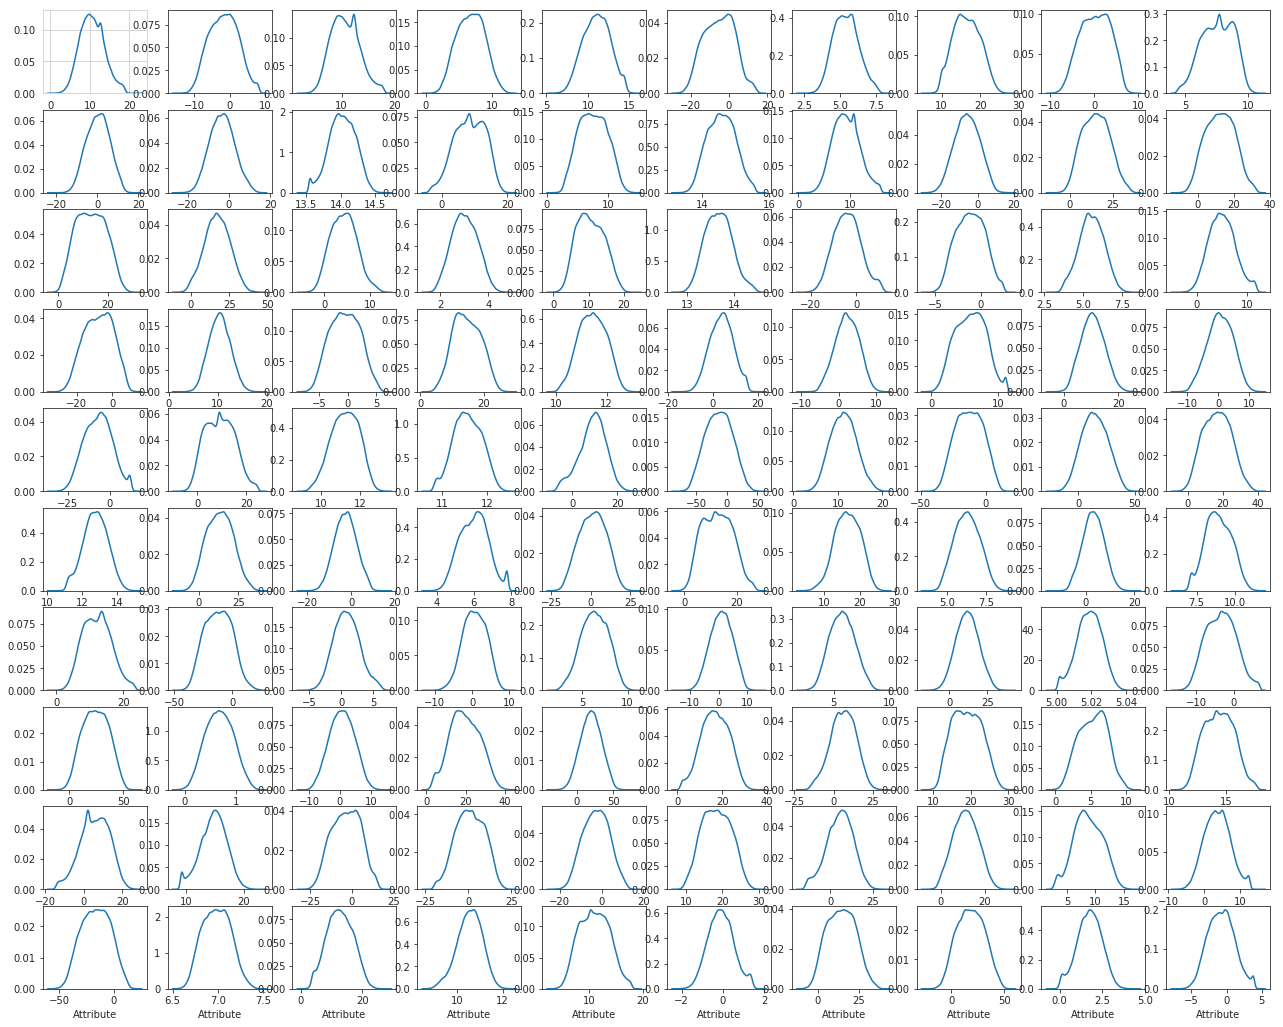

CPU times: user 14.2 s, sys: 2.95 s, total: 17.1 s
Wall time: 13.8 s


In [12]:
%%time
#test attribiutes from 1 to 101
test_attributes=test_df.columns.values[1:101]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

Let us see next 100 test attributes will be displayed in next cell.

<Figure size 432x288 with 0 Axes>

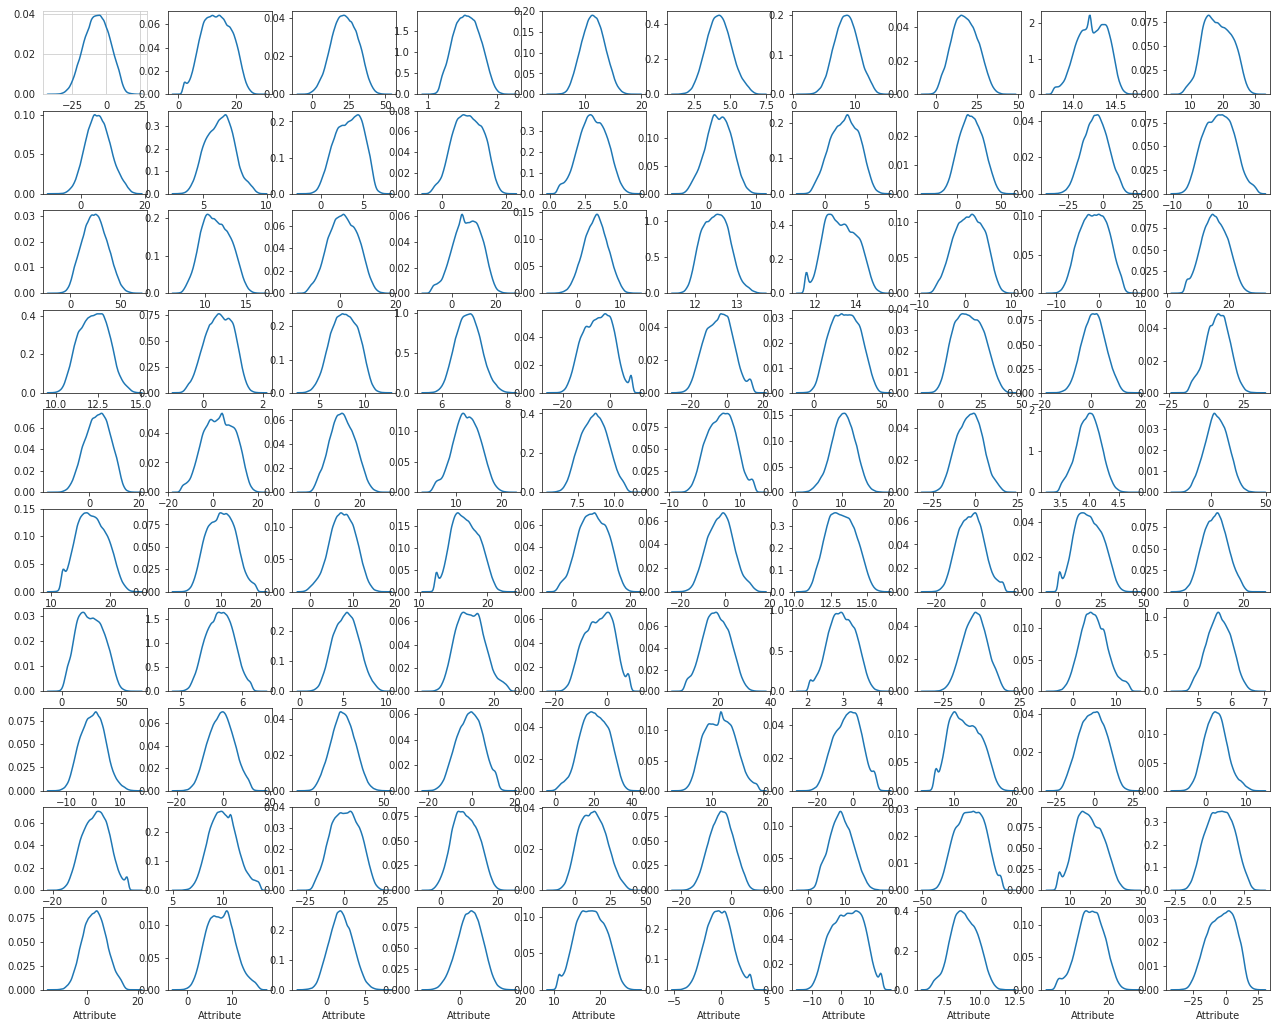

CPU times: user 14.4 s, sys: 2.9 s, total: 17.3 s
Wall time: 14 s


In [13]:
%%time
#test attributes from 101 to 202
test_attributes=test_df.columns.values[101:202]
#plot the distribution of test attributes
plot_test_attribute_distribution(test_attributes)

**Take aways:**
* We can observed that their is a considerable number of features which are significantly have different distributions. 
  For example like var_0,var_1,var_9,var_180 var_198 etc.
* We can observed that their is a considerable number of features which are significantly have same distributions. 
  For example like var_3,var_7,var_10,var_171,var_185,var_192 etc.


**Let us look distribution of mean values per rows and columns in train and test dataset**

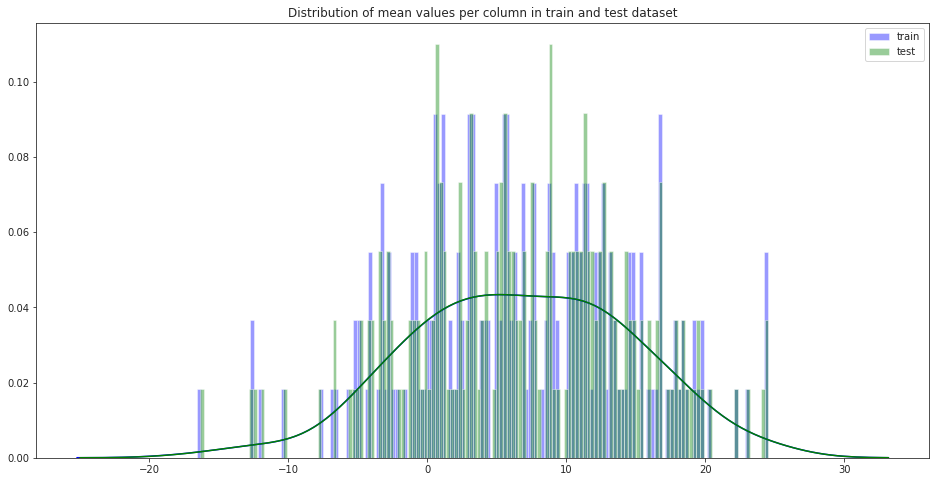

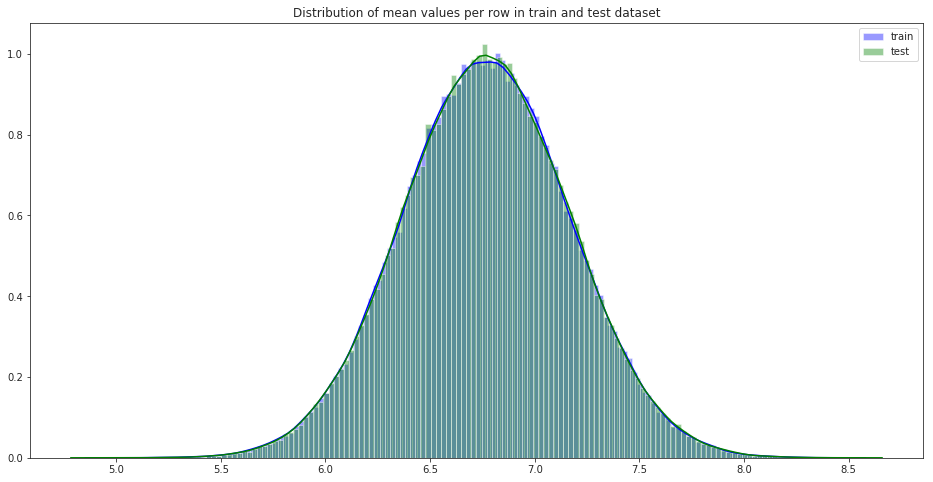

CPU times: user 2.62 s, sys: 1.04 s, total: 3.66 s
Wall time: 3.19 s


In [14]:
%%time
#Distribution of mean values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for mean values per column in train attributes
sns.distplot(train_df[train_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per column in test attributes
sns.distplot(test_df[test_attributes].mean(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of mean values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of mean values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for mean values per row in train attributes
sns.distplot(train_df[train_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per row in test attributes
sns.distplot(test_df[test_attributes].mean(axis=1),color='green',kde=True, bins=150, label='test')
plt.title('Distribution of mean values per row in train and test dataset')
plt.legend()
plt.show()

**Let us look distribution of standard deviation(std) values per rows and columns in train and test dataset**

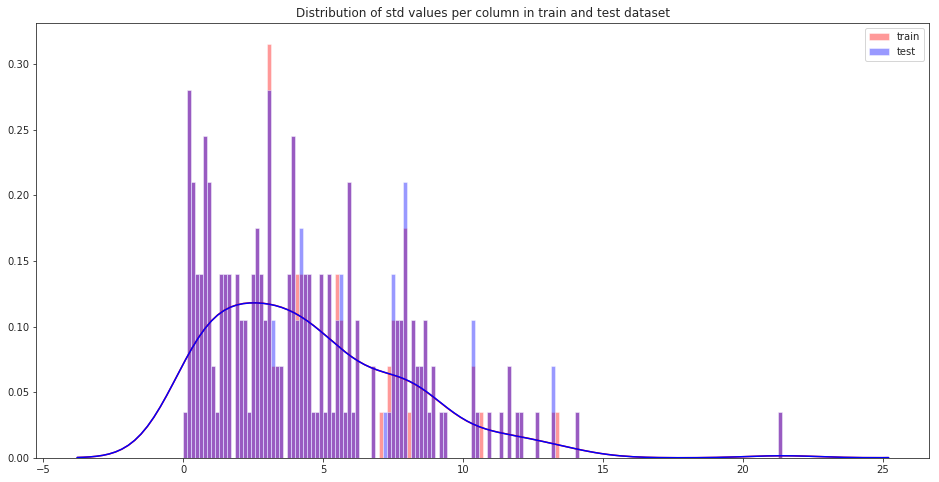

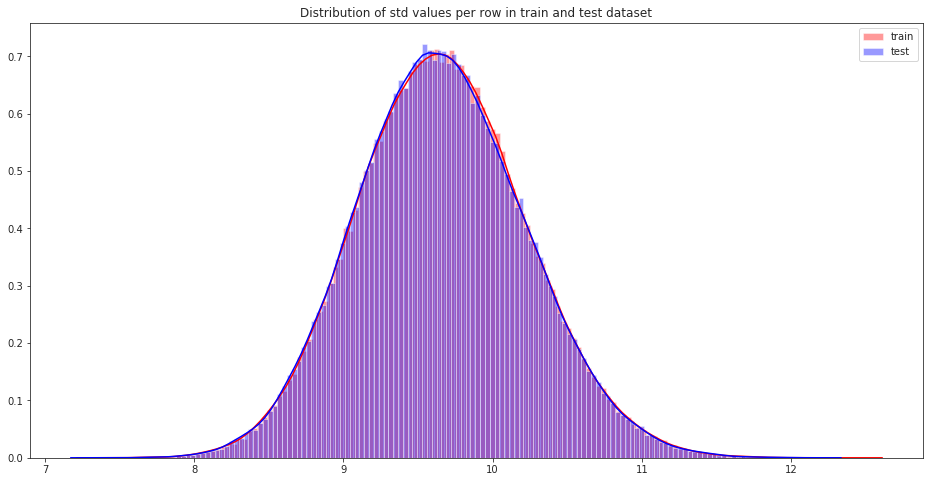

CPU times: user 3.24 s, sys: 1.05 s, total: 4.29 s
Wall time: 3.83 s


In [15]:
%%time
#Distribution of std values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for std values per column in train attributes
sns.distplot(train_df[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per column in test attributes
sns.distplot(test_df[test_attributes].std(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of std values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of std values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for std values per row in train attributes
sns.distplot(train_df[train_attributes].std(axis=1),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per row in test attributes
sns.distplot(test_df[test_attributes].std(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of std values per row in train and test dataset')
plt.legend()
plt.show()

****

**Let us look distribution of skewness per rows and columns in train and test dataset**

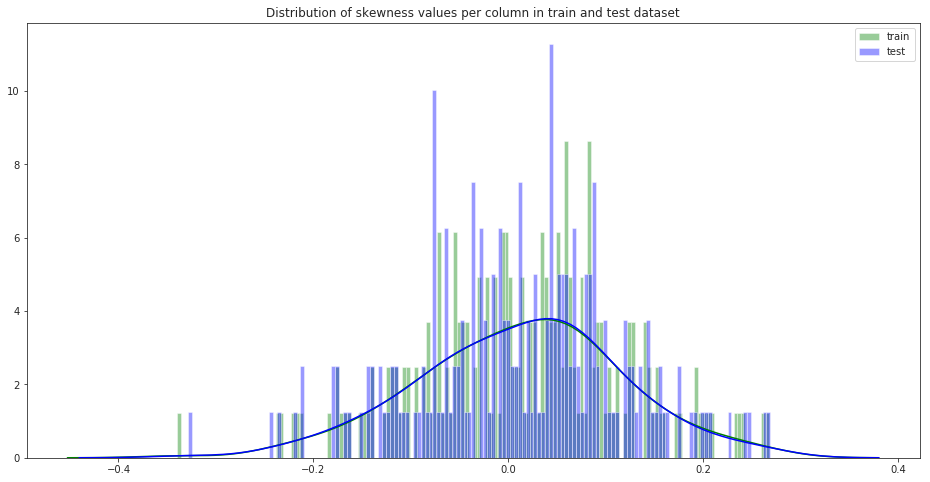

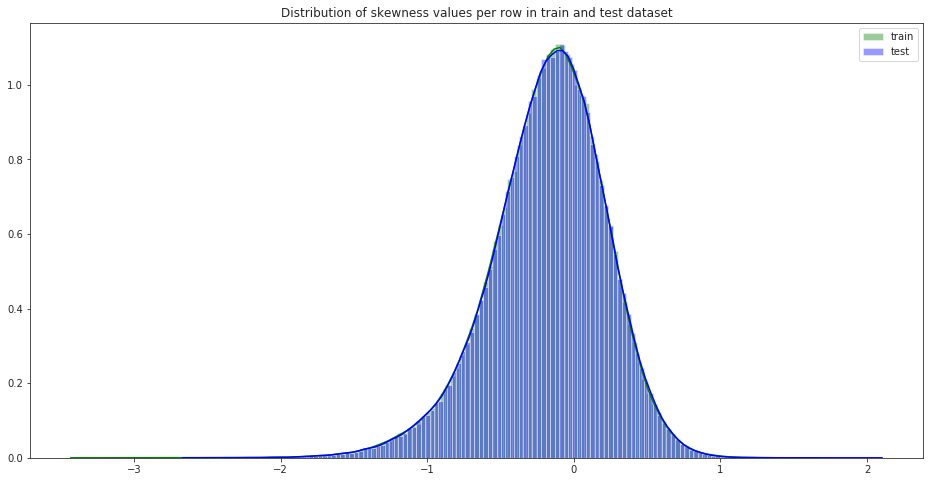

CPU times: user 4.82 s, sys: 3.18 s, total: 8 s
Wall time: 7.54 s


In [16]:
%%time
#Distribution of skew values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for skew values per column in train attributes
sns.distplot(train_df[train_attributes].skew(axis=0),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per column in test attributes
sns.distplot(test_df[test_attributes].skew(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of skewness values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of skew values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for skew values per row in train attributes
sns.distplot(train_df[train_attributes].skew(axis=1),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per row in test attributes
sns.distplot(test_df[test_attributes].skew(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of skewness values per row in train and test dataset')
plt.legend()
plt.show()

**Let us look distribution of kurtosis values per rows and columns in train and test dataset**

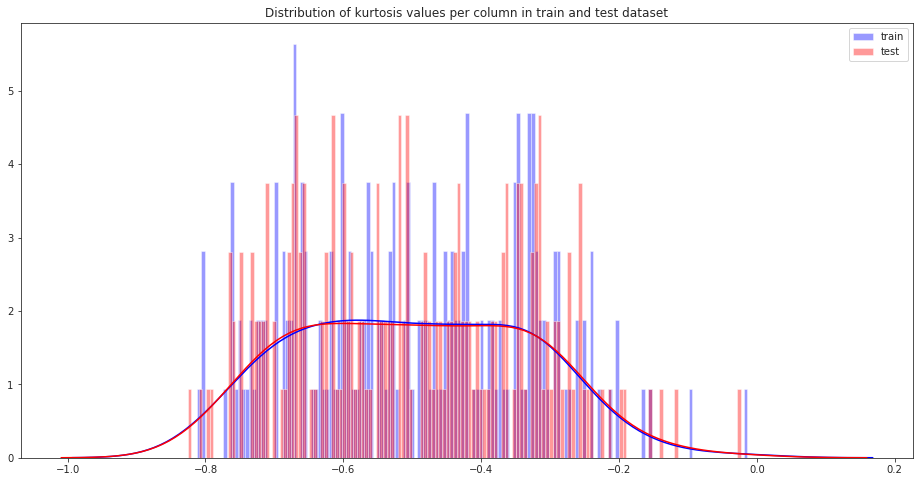

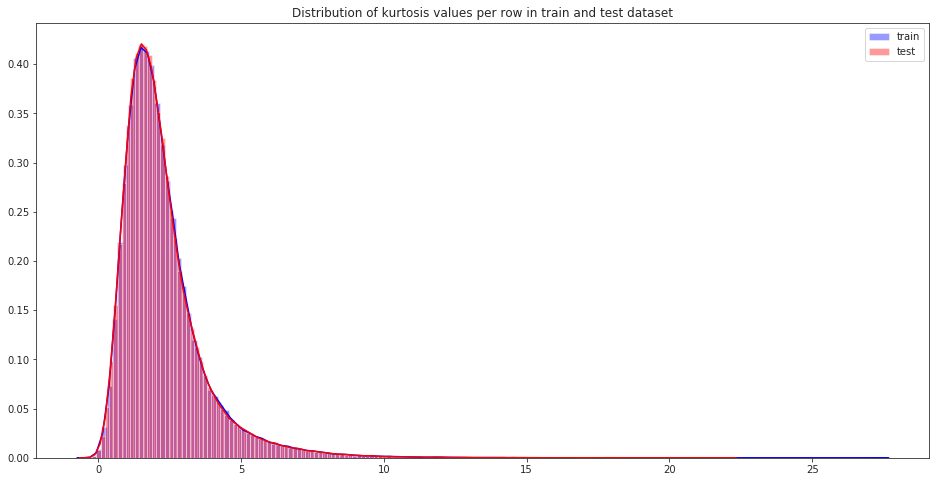

CPU times: user 4.89 s, sys: 3.04 s, total: 7.93 s
Wall time: 7.46 s


In [17]:
%%time
#Distribution of kurtosis values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=1),color='red',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()

**Missing value analysis**

In [18]:
%%time
#Finding the missing values in train and test data
train_missing=train_df.isnull().sum().sum()
test_missing=test_df.isnull().sum().sum()
print('Missing values in train data :',train_missing)
print('Missing values in test data :',test_missing)

Missing values in train data : 0
Missing values in test data : 0
CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.06 s


No missing values are present in both train and test data.

**Correlation between the attributes**

We can observed that the correlation between the train attributes is very small.

In [19]:
%%time
#Correlations in train attributes
train_attributes=train_df.columns.values[2:202]
train_correlations=train_df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlations=train_correlations[train_correlations['level_0']!=train_correlations['level_1']]
print(train_correlations.head(10))
print(train_correlations.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
CPU times: user 15.4 s, sys: 168 ms, total: 15.6 s
Wall time: 15.6 s


We can observed that the correlation between the test attributes is very small.

In [20]:
%%time
#Correlations in test attributes
test_attributes=test_df.columns.values[1:201]
test_correlations=test_df[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlations=test_correlations[test_correlations['level_0']!=test_correlations['level_1']]
print(test_correlations.head(10))
print(test_correlations.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868
CPU times: user 15.7 s, sys: 164 ms, total: 15.8 s
Wall time: 15.8 s


**Correlation plot for train and test data**

We can observed from correlation distribution plot that the correlation between the train and test attributes is very very small, it means that features are independent each other.

CPU times: user 30.9 s, sys: 292 ms, total: 31.2 s
Wall time: 31.2 s


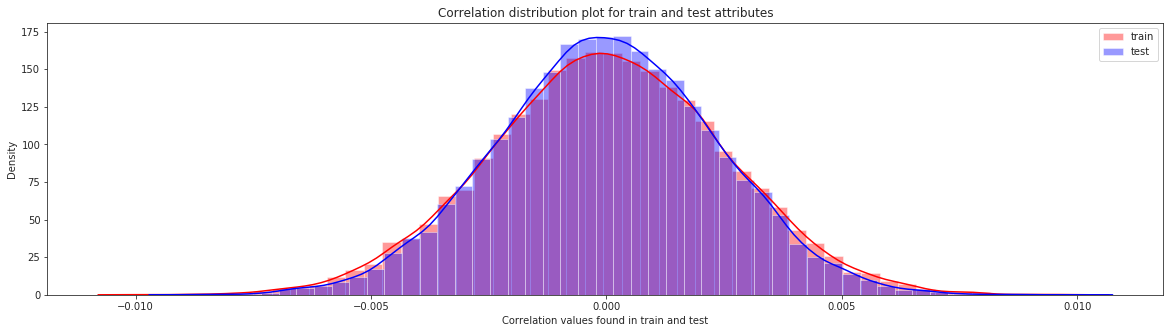

In [21]:
%%time
#Correlations in train data
train_correlations=train_df[train_attributes].corr()
train_correlations=train_correlations.values.flatten()
train_correlations=train_correlations[train_correlations!=1]
#Correlations in test data
test_correlations=test_df[test_attributes].corr()
test_correlations=test_correlations.values.flatten()
test_correlations=test_correlations[test_correlations!=1]

plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(train_correlations, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(test_correlations, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

**Feature engineering**

Let us do some feature engineering by using
* Permutation importance
* Partial dependence plots

**Permutation importance**

Permutation variable importance measure in a random forest for classification and regression.

In [22]:
#training and testing data
X=train_df.drop(columns=['ID_code','target'],axis=1)
test=test_df.drop(columns=['ID_code'],axis=1)
y=train_df['target']

Let us build simple model to find features which are more important.

In [23]:
#Split the training data
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (150000, 200)
Shape of X_valid : (50000, 200)
Shape of y_train : (150000,)
Shape of y_valid : (50000,)


**Random forest classifier**

In [24]:
%%time
#Random forest classifier
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(X_train,y_train)

CPU times: user 1min 13s, sys: 12 ms, total: 1min 13s
Wall time: 1min 13s


Let us calculate weights and show important features using eli5 library.

In [25]:
%%time
#Permutation importance
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
#fitting the model
perm_imp.fit(X_valid,y_valid)

CPU times: user 3min 43s, sys: 68 ms, total: 3min 43s
Wall time: 3min 43s


Let us see important features,

In [26]:
%%time
#Important features
eli5.show_weights(perm_imp,feature_names=X_valid.columns.tolist(),top=200)

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 27.1 ms


Weight,Feature
0.0004 ± 0.0002,var_81
0.0003 ± 0.0002,var_146
0.0003 ± 0.0002,var_109
0.0003 ± 0.0002,var_12
0.0002 ± 0.0001,var_110
0.0002 ± 0.0000,var_173
0.0002 ± 0.0001,var_174
0.0002 ± 0.0002,var_0
0.0002 ± 0.0002,var_26
0.0001 ± 0.0001,var_166


Take aways:
* Importance of the features decreases as we move down the top of the column.
* As we can see the features shown in green indicate that they have a positive impact on our prediction
* As we can see the features shown in white indicate that they have no effect on our prediction
* As we can see the features shown in red indicate that they have a negative impact on our prediction
* The most important feature is 'Var_81'

**Partial dependence plots**

Partial dependence plot gives a graphical depiction of the marginal effect of a variable on the class probability or classification.While feature importance shows what variables most affect predictions, but partial dependence plots show how a feature affects predictions.

Let us calculate partial dependence plots on random forest

**Partial dependence plot**

Let us see impact of the main features which are discovered in the previous section by using the pdpbox.

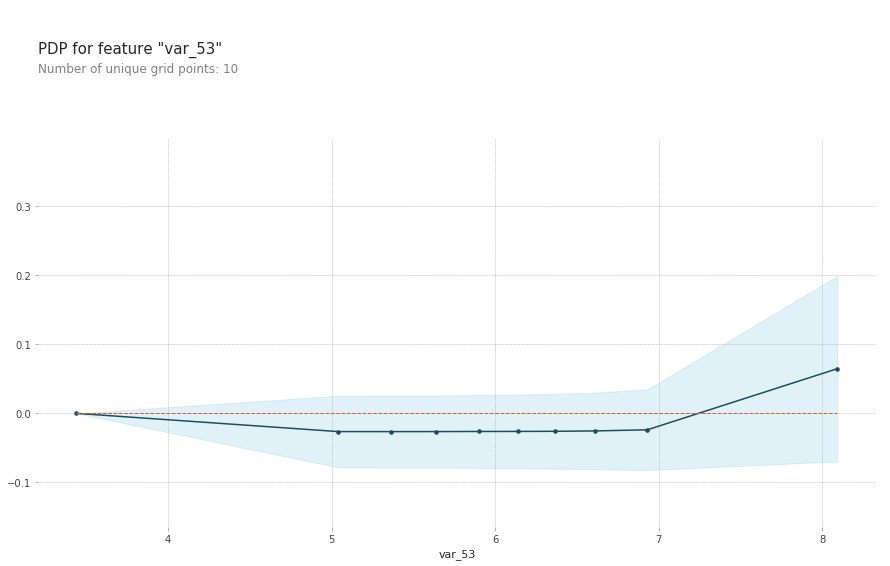

CPU times: user 4.01 s, sys: 1.02 s, total: 5.03 s
Wall time: 4.74 s


In [27]:
%%time
#Create the data we will plot 'var_53'
features=[v for v in X_valid.columns if v not in ['ID_code','target']]
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_53')
#plot feature "var_53"
pdp.pdp_plot(pdp_data,'var_53')
plt.show()

**Take aways:**
* The y_axis does not show the predictor value instead how the value changing with  the change in given predictor variable. 
* The blue shaded area indicates the level of confidence of 'var_53'.
* On y-axis having a positive value means for that particular value of predictor variable it is less likely to predict the correct class and having a positive value means it has positive impact on predicting the correct class.


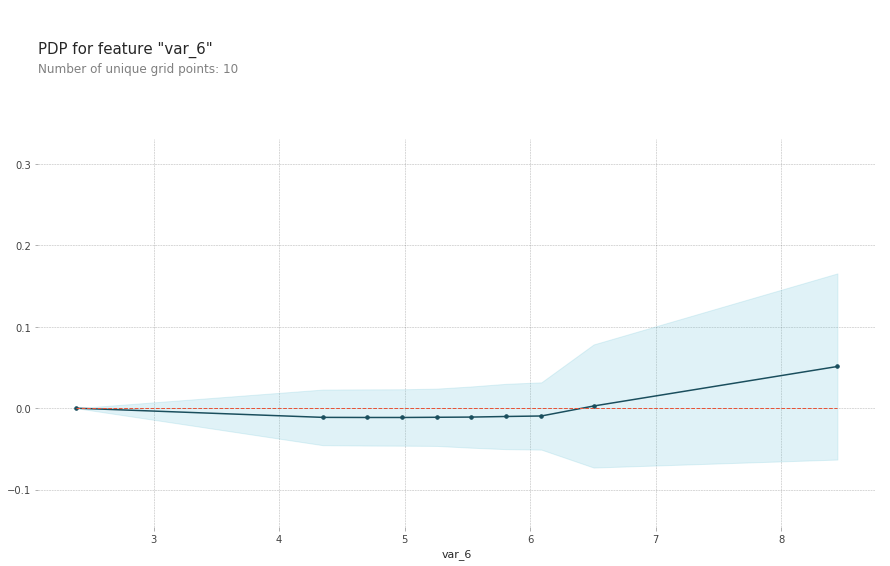

CPU times: user 3.93 s, sys: 1.22 s, total: 5.15 s
Wall time: 4.84 s


In [28]:
%%time
#Create the data we will plot 
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_6')
#plot feature "var_6"
pdp.pdp_plot(pdp_data,'var_6')
plt.show()

**Take aways:**
* The y_axis does not show the predictor value instead how the value changing with  the change in given predictor variable. 
* The blue shaded area indicates the level of confidence of 'var_6'.
* On y-axis having a positive value means for that particular value of predictor variable it is less likely to predict the correct class and having a positive value means it has positive impact on predicting the correct class.


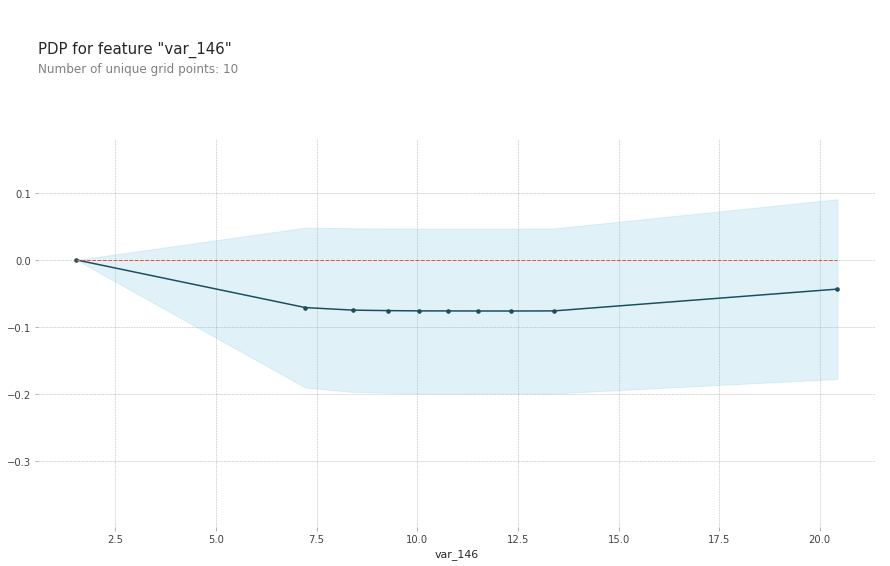

CPU times: user 3.96 s, sys: 1.24 s, total: 5.2 s
Wall time: 4.88 s


In [29]:
%%time
#Create the data we will plot 
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_146')
#plot feature "var_146"
pdp.pdp_plot(pdp_data,'var_146')
plt.show()

**Take aways:**
* The y_axis does not show the predictor value instead how the value changing with  the change in given predictor variable. 
* The blue shaded area indicates the level of confidence of 'var_146'.
* On y-axis having a positive value means for that particular value of predictor variable it is less likely to predict the correct class and having a positive value means it has positive impact on predicting the correct class.


**Handling of imbalanced data**

Now we are going to explore 5 different approaches for dealing with imbalanced datasets.
* Change the performance metric
* Oversample minority class
* Undersample majority class
* Synthetic Minority Oversampling Technique(SMOTE)
* Change the algorithm

Now let us start with simple Logistic regression model.

**Split the train data using StratefiedKFold cross validator**

In [30]:
#Training data
X=train_df.drop(['ID_code','target'],axis=1)
Y=train_df['target']
#StratifiedKFold cross validator
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,valid_index in cv.split(X,Y):
    X_train, X_valid=X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid=Y.iloc[train_index], Y.iloc[valid_index]

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160001, 200)
Shape of X_valid : (39999, 200)
Shape of y_train : (160001,)
Shape of y_valid : (39999,)


**Logistic Regression model**

In [31]:
%%time
#Logistic regression model
lr_model=LogisticRegression(random_state=42)
#fitting the lr model
lr_model.fit(X_train,y_train)

CPU times: user 6min 32s, sys: 288 ms, total: 6min 32s
Wall time: 6min 32s


**Accuracy of model**

In [32]:
#Accuracy of the model
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of the lr_model :',lr_score)

Accuracy of the lr_model : 0.9145755339029131


**Cross validation prediction of lr_model**

In [33]:
%%time
#Cross validation prediction
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.9132728216027003
CPU times: user 9min 54s, sys: 1.44 s, total: 9min 55s
Wall time: 9min 55s


Accuracy of the model is not the best metric to use when evaluating the imbalanced datasets as it may be misleading. So, we are going to change the performance metric.

**Confusion matrix**

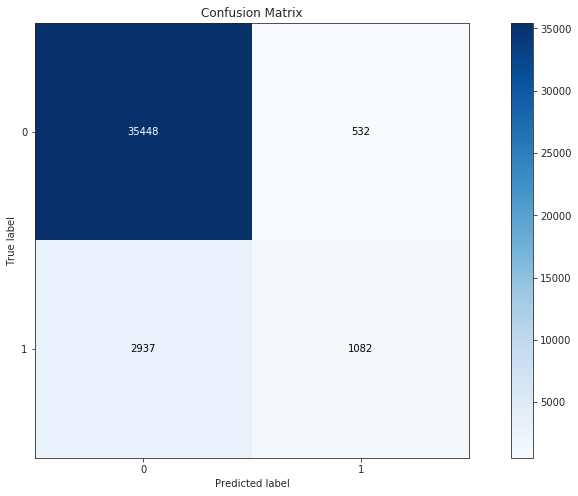

In [34]:
#Confusion matrix
cm=confusion_matrix(y_valid,cv_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_valid,cv_predict,normalize=False,figsize=(15,8))

**Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve**

ROC score : 0.6272176035427053


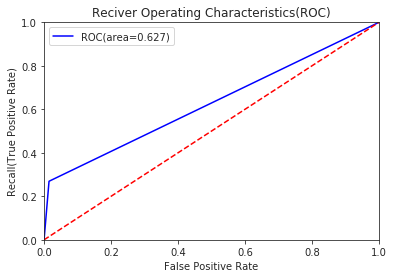

AUC: 0.6272176035427053


In [35]:
#ROC_AUC score
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

When we compare the roc_auc_score and model accuracy , model is not performing well on imbalanced data.

**Classification report**

In [36]:
#Classification report
scores=classification_report(y_valid,cv_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.67      0.27      0.38      4019

   micro avg       0.91      0.91      0.91     39999
   macro avg       0.80      0.63      0.67     39999
weighted avg       0.90      0.91      0.90     39999



We can observed that f1 score is high for number of customers those who will not make a transaction then the who will make a transaction. So, we are going to change the algorithm.

**Model performance on test data**

In [37]:
%%time
#Predicting the model
X_test=test_df.drop(['ID_code'],axis=1)
lr_pred=lr_model.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]
CPU times: user 120 ms, sys: 180 ms, total: 300 ms
Wall time: 262 ms


**Oversample minority class:**
* It can be defined as adding more copies of minority class.
* It can be a good choice when we don't have a ton of data to work with.
* Drawback is that we are adding information.This may leads to overfitting and poor performance on test data.


**Undersample majority class:**
* It can be defined as removing some observations of the majority class.
* It can be a good choice when we have a ton of data -think million of rows.
* Drawback is that we are removing information that may be valuable.This may leads to underfitting and poor performance on test data.

Both Oversampling and undersampling techniques have some drawbacks. So, we are not going to use this models for this problem and also we will use other best algorithms.

**Synthetic Minority Oversampling Technique(SMOTE)**

SMOTE uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.

In [38]:
%%time
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=42, ratio=1.0)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

CPU times: user 2min 11s, sys: 664 ms, total: 2min 11s
Wall time: 2min 11s


Let us see how baseline logistic regression model performs on synthetic data points.

In [39]:
%%time
#Logistic regression model for SMOTE
smote=LogisticRegression(random_state=42)
#fitting the smote model
smote.fit(X_smote,y_smote)

CPU times: user 19min 28s, sys: 560 ms, total: 19min 29s
Wall time: 19min 29s


**Accuracy of model**

In [40]:
#Accuracy of the model
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7984012173260516


Cross validation prediction of smoth_model

In [41]:
%%time
#Cross validation prediction
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8042940522512507
CPU times: user 24min 20s, sys: 1.73 s, total: 24min 21s
Wall time: 24min 21s


**Confusion matrix**

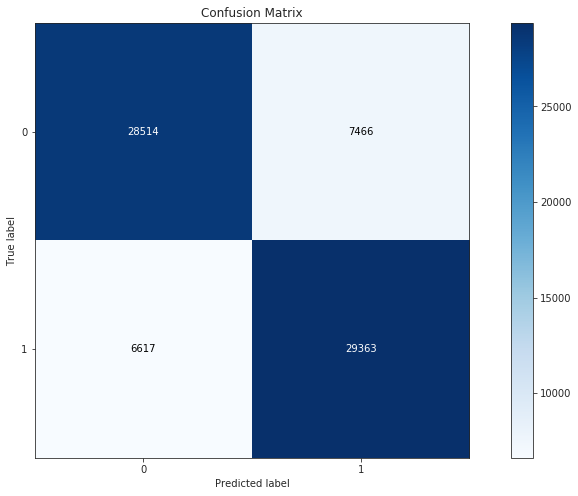

In [42]:
#Confusion matrix
cm=confusion_matrix(y_smote_v,cv_pred)
#Plot the confusion matrix
plot_confusion_matrix(y_smote_v,cv_pred,normalize=False,figsize=(15,8))

**Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve**

ROC score : 0.8042940522512506


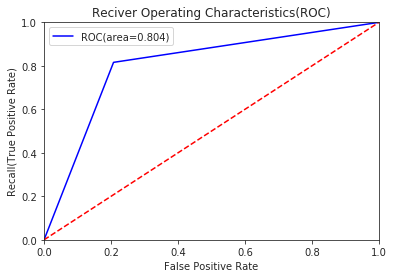

AUC: 0.8042940522512506


In [43]:
#ROC_AUC score
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

**Classification report**

In [44]:
#Classification report
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     35980
           1       0.80      0.82      0.81     35980

   micro avg       0.80      0.80      0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



**Model performance on test data**

In [45]:
%%time
#Predicting the model
X_test=test_df.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]
CPU times: user 112 ms, sys: 180 ms, total: 292 ms
Wall time: 267 ms


We can observed that smote model is performing well on imbalance data compare to logistic regression.

**LightGBM:**

LightGBM is a gradient boosting framework that uses tree based learning algorithms. We are going to use LightGBM model.


Let us build LightGBM model

In [46]:
#Training the model
#training data
lgb_train=lgb.Dataset(X_train,label=y_train)
#validation data
lgb_valid=lgb.Dataset(X_valid,label=y_valid)

**choosing of  hyperparameters**

In [47]:
#Selecting best hyperparameters by tuning of different parameters
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

**Training the lgbm model**

In [48]:
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

Training until validation scores don't improve for 5000 rounds.
[1000]	training's auc: 0.939079	valid_1's auc: 0.882655
[2000]	training's auc: 0.958502	valid_1's auc: 0.887842
[3000]	training's auc: 0.971937	valid_1's auc: 0.889724
[4000]	training's auc: 0.981492	valid_1's auc: 0.890474
[5000]	training's auc: 0.988242	valid_1's auc: 0.890772
[6000]	training's auc: 0.992813	valid_1's auc: 0.890549
[7000]	training's auc: 0.995775	valid_1's auc: 0.890488
[8000]	training's auc: 0.997627	valid_1's auc: 0.890549
[9000]	training's auc: 0.998739	valid_1's auc: 0.890309
[10000]	training's auc: 0.999359	valid_1's auc: 0.889882
Did not meet early stopping. Best iteration is:
[10000]	training's auc: 0.999359	valid_1's auc: 0.889882


**lgbm model performance on test data**

In [49]:
X_test=test_df.drop(['ID_code'],axis=1)
#predict the model
#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.38391682 0.41261082 0.33964579 ... 0.0058249  0.13459858 0.26750038]
[0 0 0 ... 0 0 0]


**Let us plot the important features**

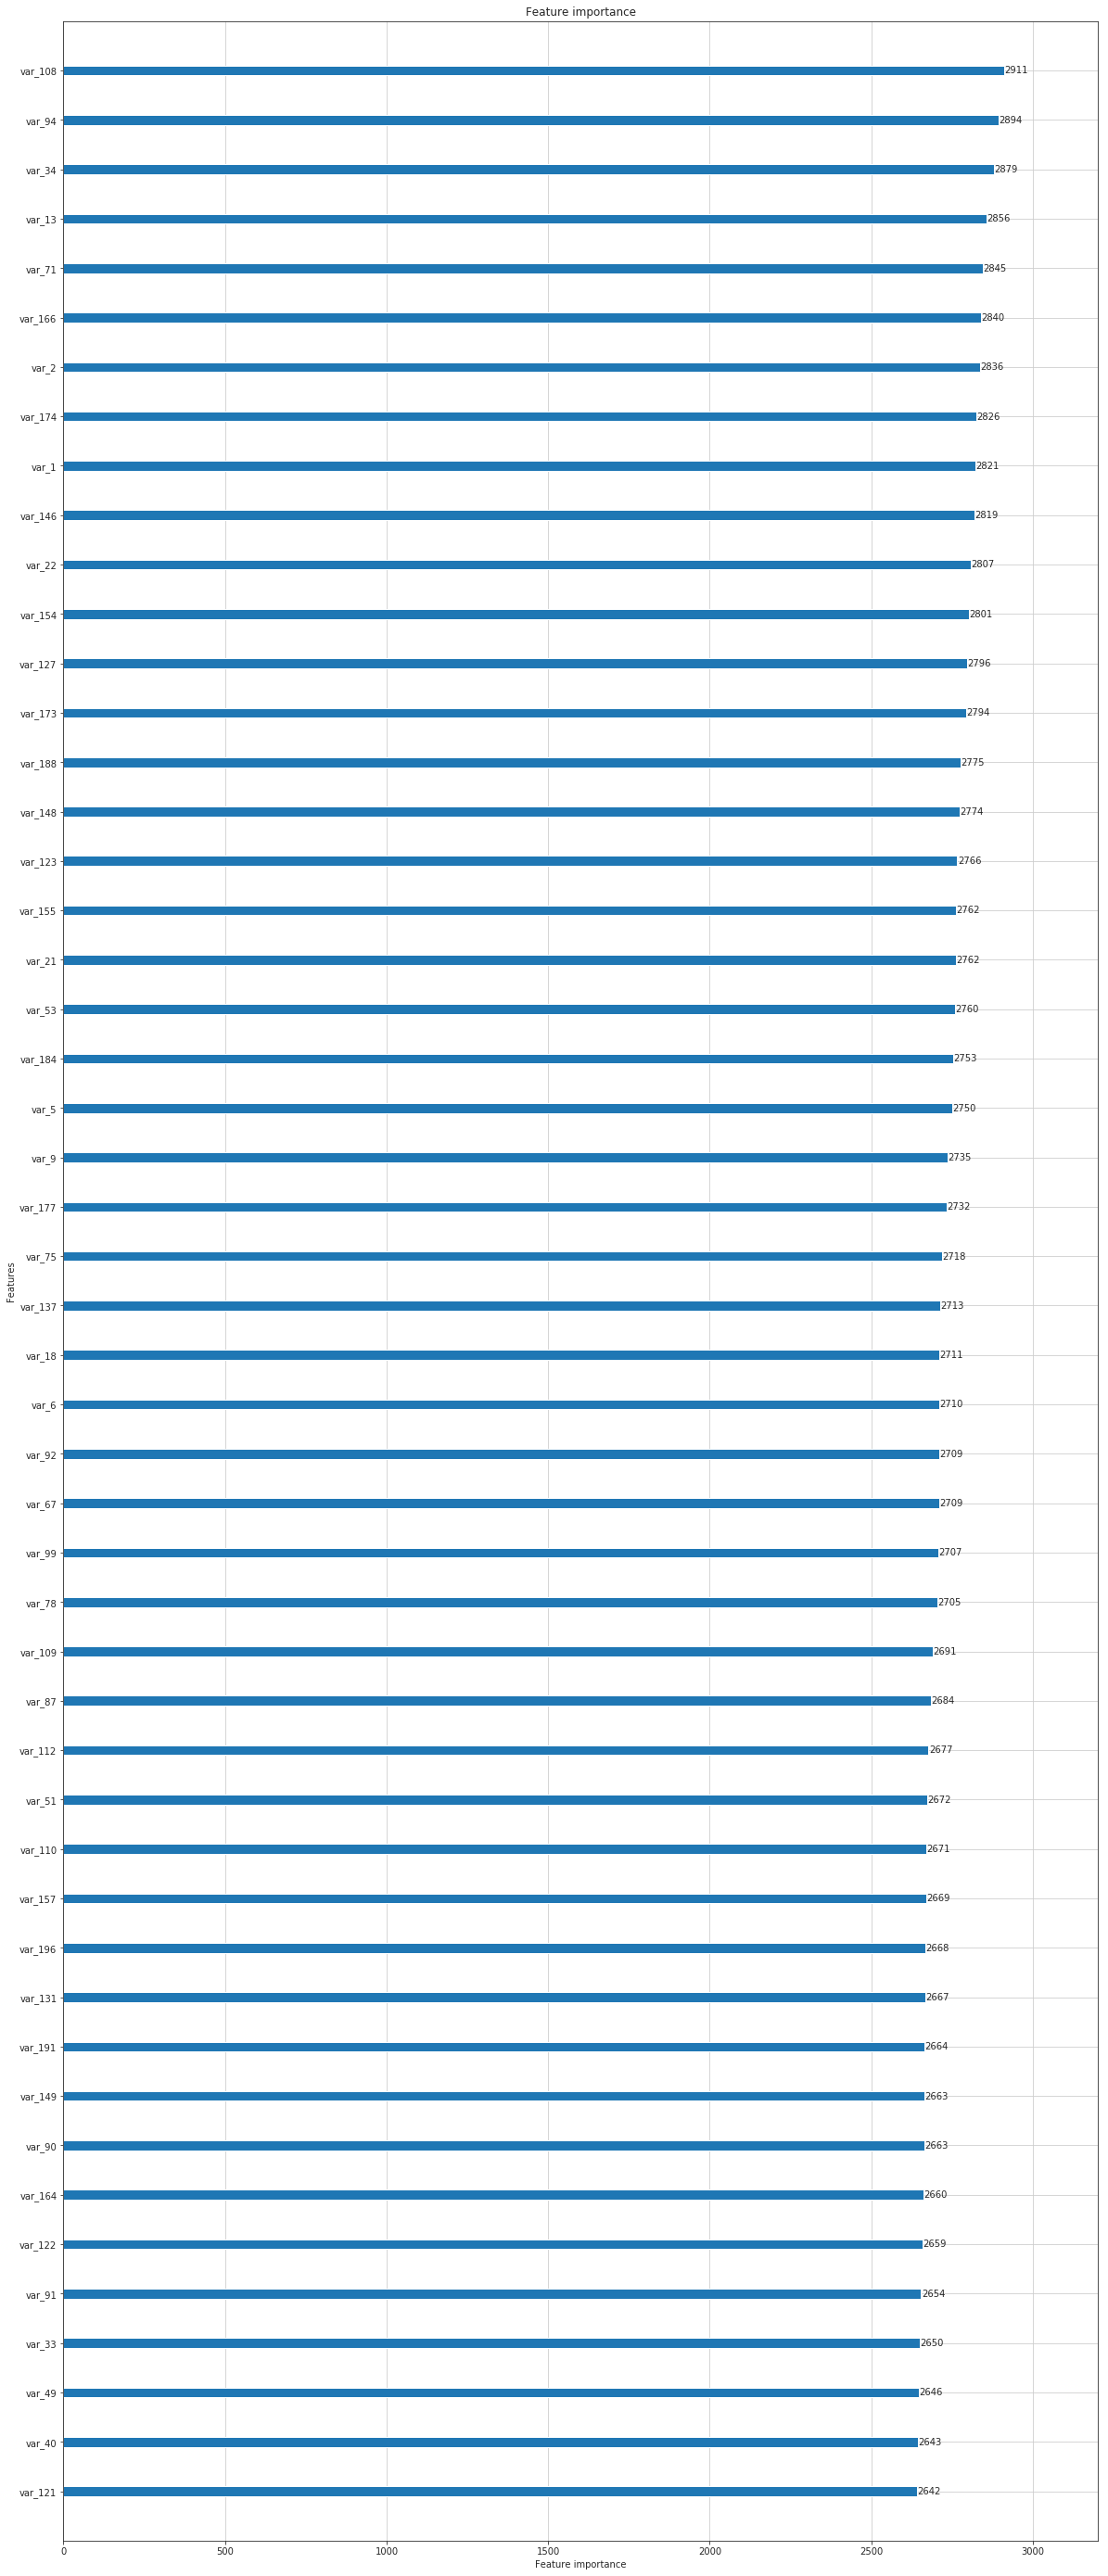

In [50]:
#plot the important features
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

**Conclusion :**

We tried model with logistic regression,smote and lightgbm. But lightgbm model is performing well on imbalanced data compared to other models based on scores of roc_auc_score.

In [51]:
#final submission
sub_df=pd.DataFrame({'ID_code':test_df['ID_code'].values})
sub_df['lgbm_predict_prob']=lgbm_predict_prob
sub_df['lgbm_predict']=lgbm_predict
sub_df.to_csv('submission.csv',index=False)
sub_df.head()

,ID_code,lgbm_predict_prob,lgbm_predict
0,test_0,0.383917,0
1,test_1,0.412611,0
2,test_2,0.339646,0
3,test_3,0.255199,0
4,test_4,0.150399,0
